<a href="https://colab.research.google.com/github/balamocr/Article_povertyPhd/blob/main/Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Leer el archivo de Excel correctamente
file_path_excel = 'gastopersona.xlsx'
gastopersona = pd.read_excel(file_path_excel)

# Leer el archivo de Excel con los datos de pobreza
file_path_pobreza = 'pobreza16.xlsx'
pobreza_data = pd.read_excel(file_path_pobreza)

# Asegurarse de que ambas tablas tienen la columna 'folioviv'
if 'folioviv' not in gastopersona.columns or 'folioviv' not in pobreza_data.columns:
    raise KeyError("Una de las tablas no tiene la columna 'folioviv'")

# Seleccionar las columnas requeridas del archivo de Excel de pobreza
columns_to_merge = [
    'folioviv', 'pobreza_e', 'pobreza_m', 'vul_car', 'carencias', 'carencias3',
    'ins_ali', 'ic_ali', 'lca', 'ic_ali_nc', 'plp', 'plp_e', 's_salud', 'niv_ed', 'pobreza'
]

# Verificar si las columnas están presentes en el archivo de Excel de pobreza
missing_columns = [col for col in columns_to_merge if col not in pobreza_data.columns]
if missing_columns:
    raise KeyError(f"Las siguientes columnas están ausentes en el archivo de Excel: {missing_columns}")

# Convertir la columna 'frec_rem' a numérica, manejando errores
gastopersona['frec_rem'] = pd.to_numeric(gastopersona['frec_rem'], errors='coerce')

# Unir las tablas basado en la columna 'folioviv' usando un left join para mantener el mismo número de elementos
merged_df = pd.merge(gastopersona, pobreza_data[columns_to_merge], on='folioviv', how='left')

# Llenar los valores faltantes en la columna 'cantidad' con 1 y asegurarse de que sea numérica
merged_df['cantidad'] = pd.to_numeric(merged_df['cantidad'], errors='coerce').fillna(1).astype(int)

# Eliminar duplicados basados en las columnas 'folioviv', 'foliohog', 'clave'
merged_df.drop_duplicates(subset=['folioviv', 'foliohog', 'clave'], keep='first', inplace=True)

# Seleccionar las columnas requeridas en el orden especificado
final_columns = [
    'folioviv', 'foliohog', 'clave', 'frec_rem', 'cantidad', 'pobreza_e', 'pobreza_m', 'vul_car',
    'carencias', 'carencias3', 'ins_ali', 'ic_ali', 'lca', 'ic_ali_nc', 'plp', 'plp_e','s_salud', 'niv_ed', 'pobreza'
]
result_df = merged_df[final_columns]

# Guardar el resultado en un nuevo archivo Parquet
result_df.to_parquet('food_frecuency_quantity.parquet')

# Mostrar los primeros 50 valores
print(result_df.head(50))

print("El archivo ha sido unido y guardado exitosamente.")


      folioviv  foliohog clave  frec_rem  cantidad  pobreza_e  pobreza_m  \
0    100003802         1  J002       9.0         1        0.0        0.0   
2    100068004         1  A202       6.0         1        0.0        0.0   
32   100068006         1  A202       5.0         1        0.0        0.0   
62   100074204         1  A244       4.0         1        0.0        0.0   
77   100074205         1  J016       8.0         1        0.0        0.0   
80   100076303         1  A243       6.0         1        0.0        0.0   
110  100076303         1  A244       6.0         1        0.0        0.0   
140  100076306         1  A244       6.0         1        0.0        0.0   
160  100076306         1  B002       6.0         2        0.0        0.0   
180  100076306         1  J016       9.0         1        0.0        0.0   
185  100076306         1  J026       9.0         1        0.0        0.0   
190  100079801         1  A202       6.0         1        0.0        0.0   
202  1000798

In [2]:
import pandas as pd

# Crear el diccionario de mapeo de letras a números
letter_to_number = {
    'A': '1', 'B': '2', 'C': '3', 'D': '4', 'E': '5', 'F': '6', 'G': '7', 'H': '8', 'I': '9',
    'J': '10', 'K': '11', 'L': '12', 'M': '13', 'N': '14', 'O': '15', 'P': '16', 'Q': '17',
    'R': '18', 'S': '19', 'T': '20'
}

# Leer el archivo merged_result.parquet
result_df = pd.read_parquet('food_frecuency_quantity.parquet')

# Sustituir la letra del valor en la columna clave por el número correspondiente
result_df['clave'] = result_df['clave'].apply(lambda x: letter_to_number.get(x[0], x[0]) + x[1:])

# Mostrar los primeros 50 resultados
print(result_df.head(50))

# Guardar los resultados en otro archivo .parquet
result_df.to_parquet('food_frecuency_quantity_processed_result.parquet')

print("Los resultados han sido guardados exitosamente en 'food_frecuency_quantity_processed_result.parquet'.")

      folioviv  foliohog  clave  frec_rem  cantidad  pobreza_e  pobreza_m  \
0    100003802         1  10002       9.0         1        0.0        0.0   
2    100068004         1   1202       6.0         1        0.0        0.0   
32   100068006         1   1202       5.0         1        0.0        0.0   
62   100074204         1   1244       4.0         1        0.0        0.0   
77   100074205         1  10016       8.0         1        0.0        0.0   
80   100076303         1   1243       6.0         1        0.0        0.0   
110  100076303         1   1244       6.0         1        0.0        0.0   
140  100076306         1   1244       6.0         1        0.0        0.0   
160  100076306         1   2002       6.0         2        0.0        0.0   
180  100076306         1  10016       9.0         1        0.0        0.0   
185  100076306         1  10026       9.0         1        0.0        0.0   
190  100079801         1   1202       6.0         1        0.0        0.0   

In [ ]:
import pandas as pd

# Lista de archivos Parquet a unir
files = [
    'food_frecuency_quantity_processed_result18.parquet',
    'food_frecuency_quantity_processed_result(1).parquet',
    'food_frecuency_quantity_processed_result20.parquet'
]

# Leer y concatenar todos los archivos en un solo DataFrame
df = pd.concat([pd.read_parquet(file) for file in files])

# Guardar el DataFrame combinado en un nuevo archivo Parquet
df.to_parquet('combined_food_frecuency_quantity_16_to_20.parquet')

# Mostrar los primeros 50 resultados
print(df.head(50))


      folioviv  foliohog  clave  frec_rem  cantidad  pobreza_e  pobreza_m  \
0    100027202         1  10016       8.0         1        0.0        0.0   
2    100027202         1  10031       8.0         1        0.0        0.0   
4    100027202         1  10035       8.0         1        0.0        0.0   
6    100045501         1   6003       8.0         1        0.0        0.0   
10   100045505         1   8056       6.0         1        0.0        0.0   
15   100045505         1   8057       6.0         1        0.0        0.0   
20   100045505         1   8109       6.0         1        0.0        0.0   
25   100045505         1   8130       6.0         1        0.0        0.0   
30   100045505         1   2002       6.0         1        0.0        0.0   
60   100045506         1   1244       6.0         1        0.0        0.0   
62   100045506         1   2002       6.0         1        0.0        0.0   
68   100045506         1   8109       9.0         1        0.0        0.0   

     clave  frec_rem  pobreza_e  pobreza_m  vul_car  carencias  carencias3  \
320   1244   82461.0        0.0        0.0      0.0        0.0         0.0   
16   10016   65916.0        0.0        0.0      1.0        1.0         0.0   
319   1243   40944.0        0.0        0.0      0.0        0.0         0.0   
370   2002   38131.0        0.0        0.0      0.0        0.0         0.0   
321   1245   18652.0        0.0        0.0      1.0        1.0         0.0   
..     ...       ...        ...        ...      ...        ...         ...   
98    1031       1.0        0.0        0.0      1.0        1.0         0.0   
507   8044       1.0        0.0        0.0      0.0        0.0         0.0   
252   1174       1.0        0.0        0.0      1.0        1.0         0.0   
87    1018       1.0        0.0        1.0      0.0        1.0         0.0   
230   1151       1.0        0.0        0.0      1.0        1.0         0.0   

     ins_ali  ic_ali  lca  ic_ali_nc  plp  plp_e  pobreza  
320

<ipython-input-3-0374ebc612be>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clave', y='frec_rem', data=top_5, palette='viridis')


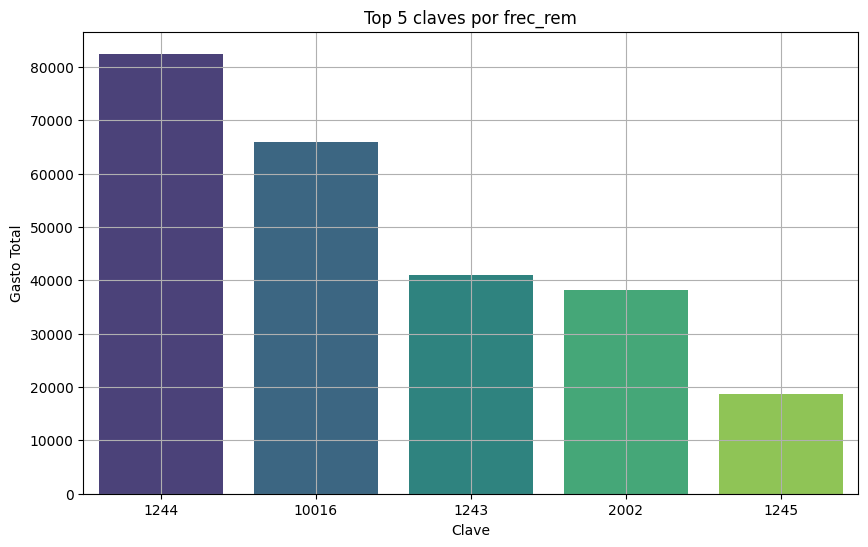

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


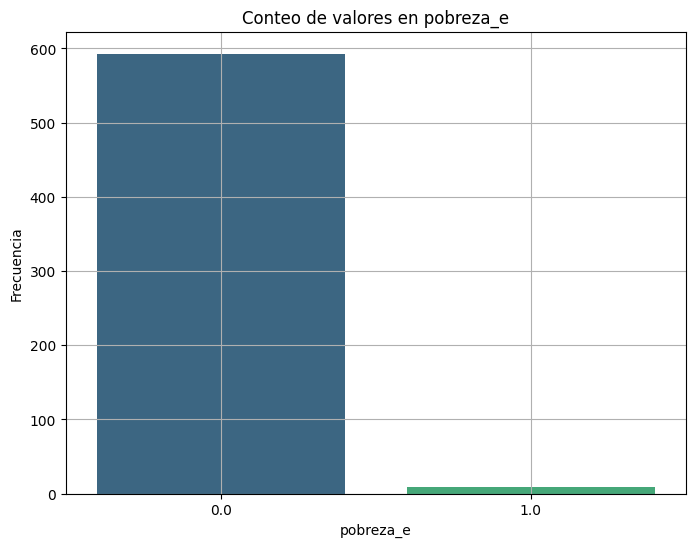

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


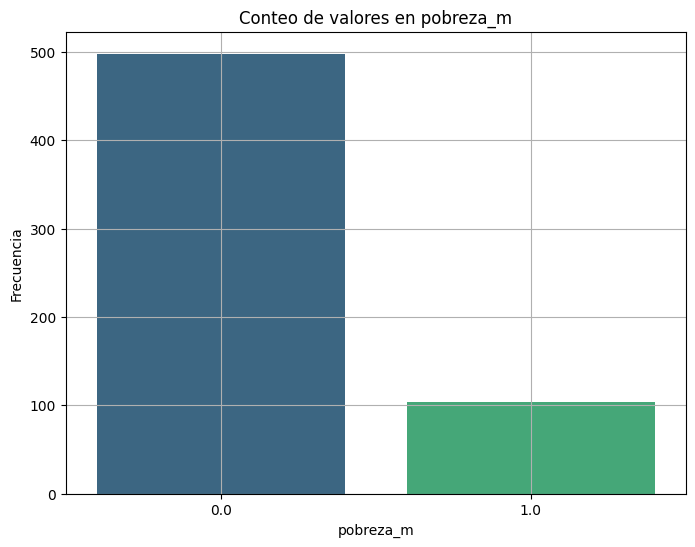

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


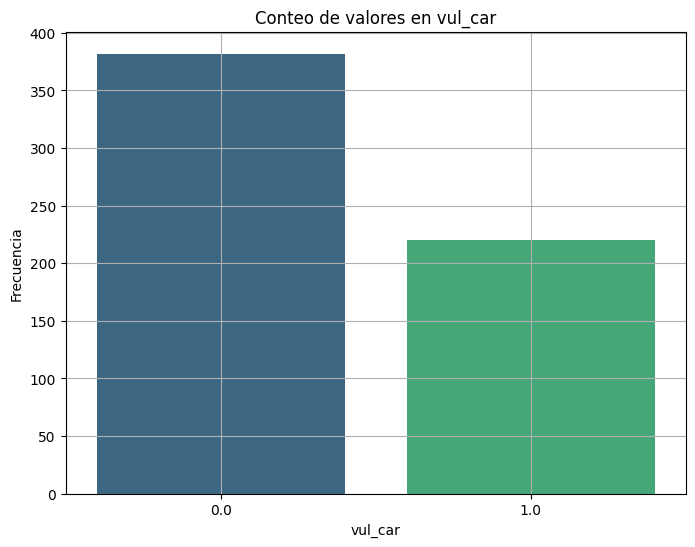

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


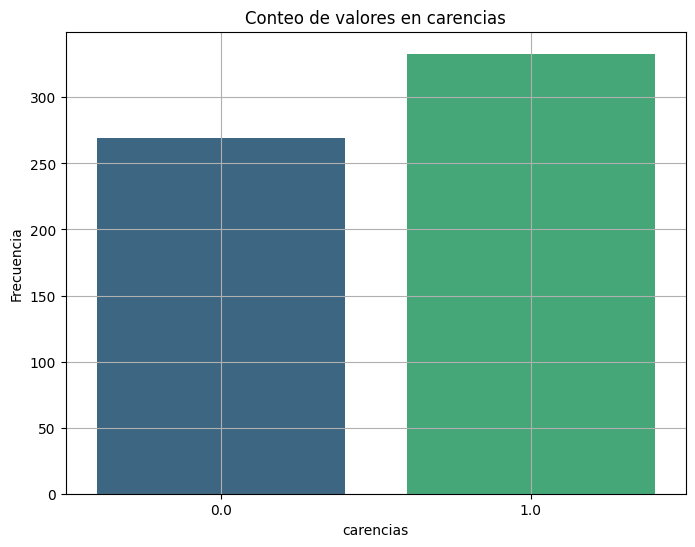

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


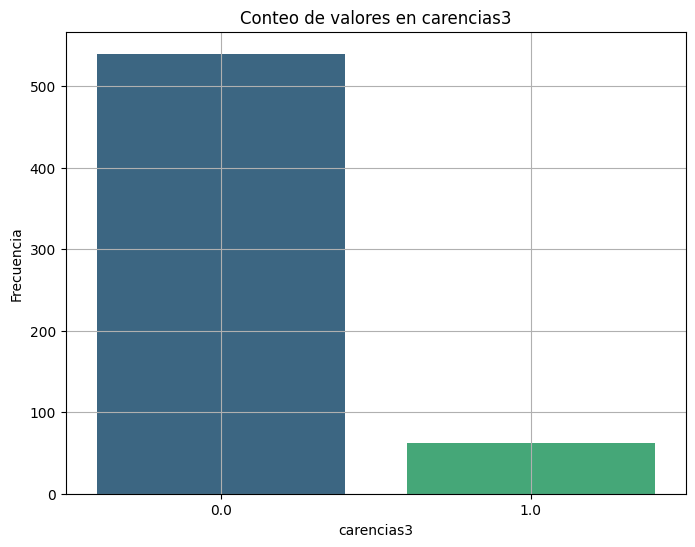

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


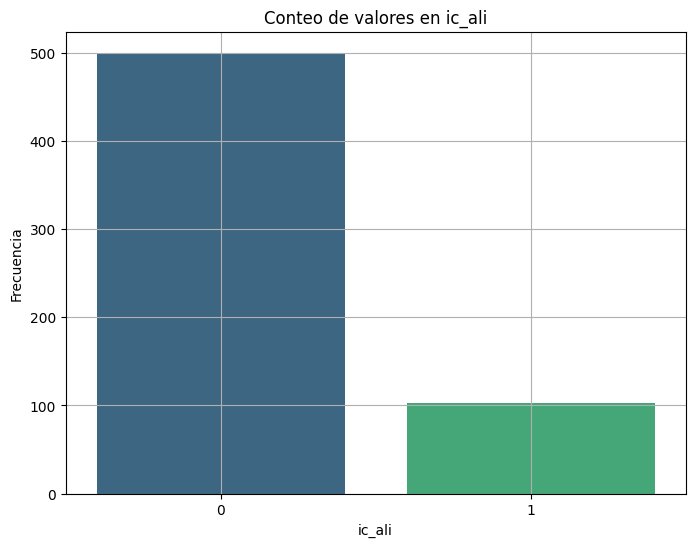

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


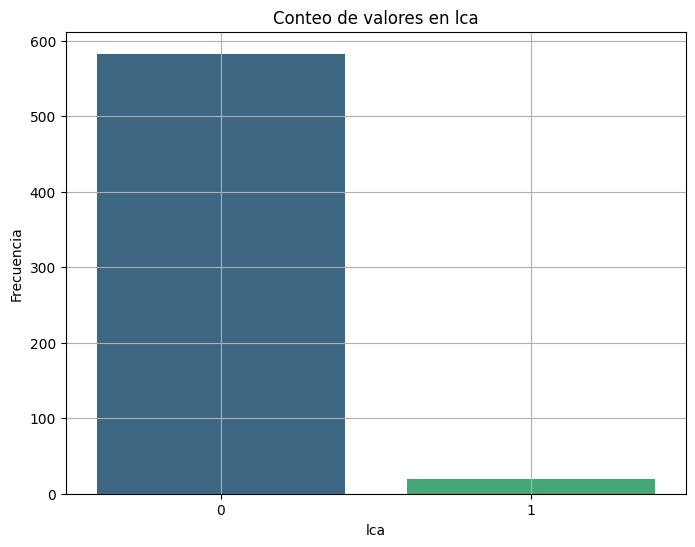

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


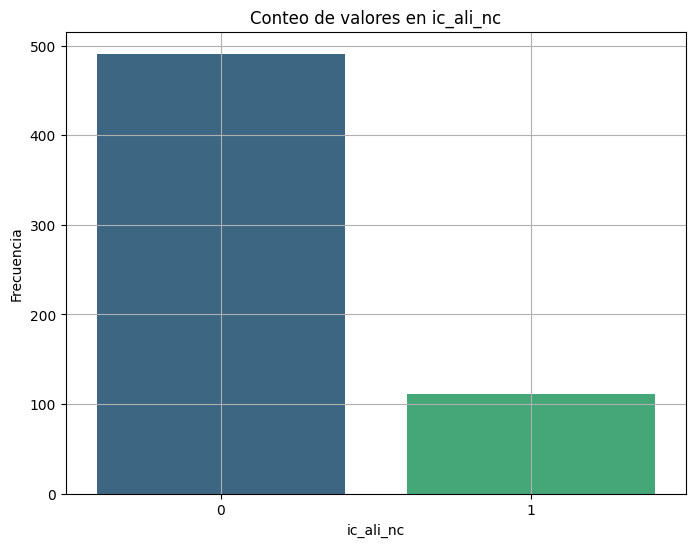

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


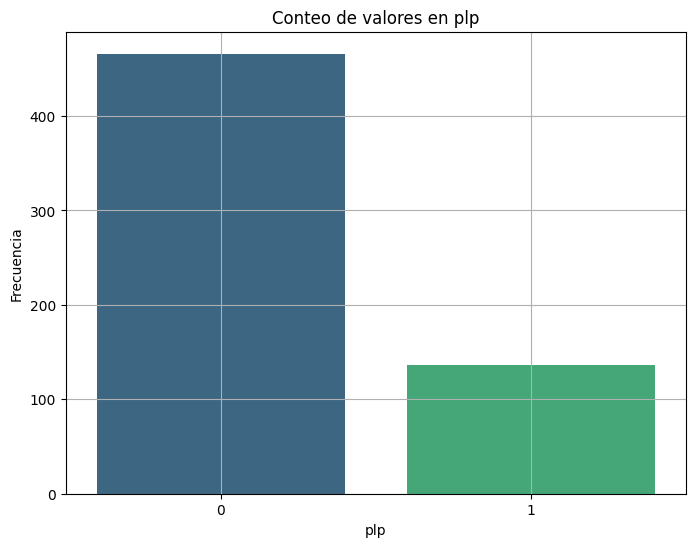

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


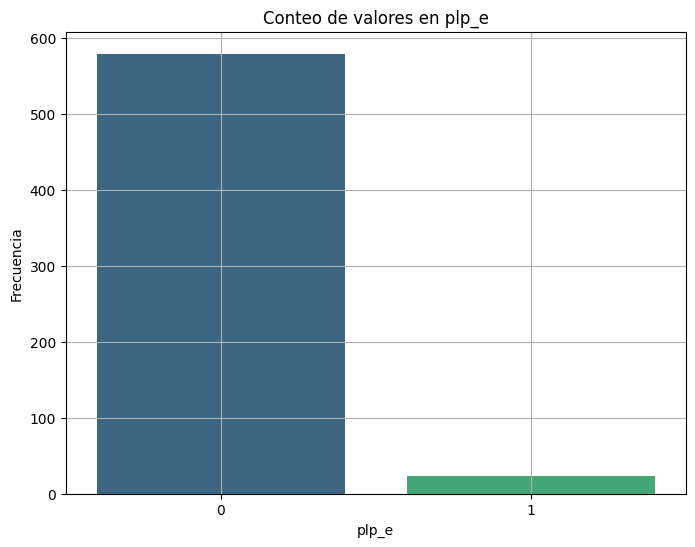

<ipython-input-3-0374ebc612be>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=result_df, palette='viridis')


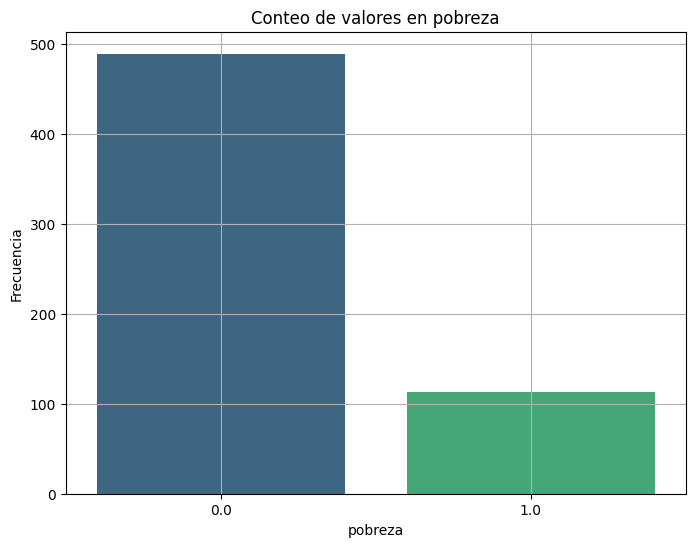

<ipython-input-3-0374ebc612be>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ins_ali_counts.index, y=ins_ali_counts.values, palette='viridis')


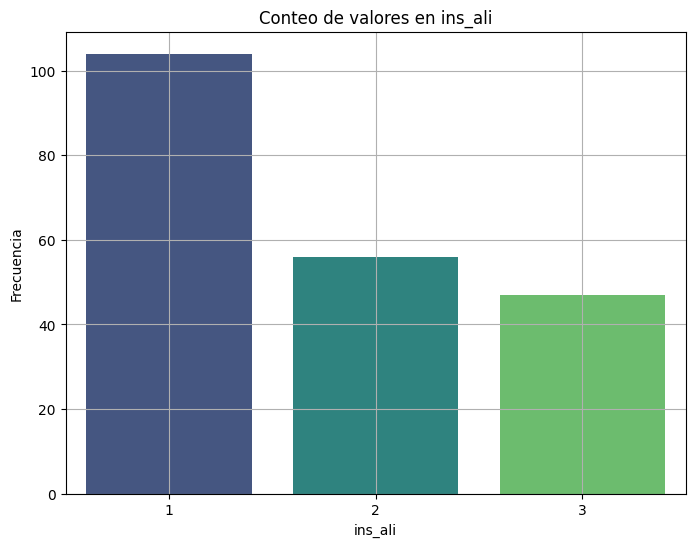

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Parquet
file_path = 'combined_food_frecuency_quantity_16_to_20.parquet'
data = pd.read_parquet(file_path)

# Seleccionar las columnas relevantes
columns_to_select = [
    'clave', 'frec_rem', 'pobreza_e', 'pobreza_m', 'vul_car', 'carencias',
    'carencias3', 'ins_ali', 'ic_ali', 'lca', 'ic_ali_nc', 'plp', 'plp_e'
]

# Verificar si las columnas están presentes en el archivo
missing_columns = [col for col in columns_to_select if col not in data.columns]
if missing_columns:
    raise KeyError(f"Las siguientes columnas están ausentes en el archivo: {missing_columns}")

# Agrupar por 'clave' y sumar los valores de 'frec_rem', mantener el primer valor de las otras columnas
grouped_data = data.groupby('clave', as_index=False).agg({
    'frec_rem': 'sum',
    'pobreza_e': 'first',
    'pobreza_m': 'first',
    'vul_car': 'first',
    'carencias': 'first',
    'carencias3': 'first',
    'ins_ali': 'first',
    'ic_ali': 'first',
    'lca': 'first',
    'ic_ali_nc': 'first',
    'plp': 'first',
    'plp_e': 'first',
    'pobreza': 'first'
})

# Ordenar los datos agrupados por 'frec_rem' en orden descendente
sorted_data = grouped_data.sort_values(by='frec_rem', ascending=False)

# Seleccionar las columnas relevantes
final_columns = [
    'clave', 'frec_rem', 'pobreza_e', 'pobreza_m', 'vul_car', 'carencias',
    'carencias3', 'ins_ali', 'ic_ali', 'lca', 'ic_ali_nc', 'plp', 'plp_e','pobreza'
]
result_df = sorted_data[final_columns]

# Mostrar los resultados
print(result_df)

# Contar los valores de 0 y 1 en las columnas especificadas
columns_to_count = ['pobreza_e', 'pobreza_m', 'vul_car', 'carencias', 'carencias3', 'ic_ali', 'lca', 'ic_ali_nc', 'plp', 'plp_e', 'pobreza']
count_results = {col: result_df[col].value_counts().to_dict() for col in columns_to_count}

# Contar los valores de 1, 2 y 3 en 'ins_ali'
ins_ali_counts = result_df['ins_ali'].value_counts().reindex([1, 2, 3], fill_value=0)

print("\nConteo de valores en las columnas especificadas:")
for col, counts in count_results.items():
    print(f"\n{col}: {counts}")

print(f"\nConteo de valores en 'ins_ali':\n{ins_ali_counts}")

# Guardar el resultado en un nuevo archivo CSV (opcional)
# result_df.to_csv('sorted_gastos.csv', index=False)

# Guardar el resultado en un nuevo archivo Parquet (opcional)
# result_df.to_parquet('sorted_gastos.parquet', index=False)

print("Los resultados han sido generados y guardados.")

# Graficar los 5 elementos que más gastan
top_5 = result_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='clave', y='frec_rem', data=top_5, palette='viridis')
plt.title('Top 5 claves por frec_rem')
plt.xlabel('Clave')
plt.ylabel('Gasto Total')
plt.grid(True)
plt.savefig('top_5_frec_rem.png')
plt.show()

# Graficar los valores de 0 y 1 en las columnas especificadas
for col in columns_to_count:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=result_df, palette='viridis')
    plt.title(f'Conteo de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.savefig(f'conteo_{col}.png')
    plt.show()

# Graficar los valores de 1, 2 y 3 en 'ins_ali'
plt.figure(figsize=(8, 6))
sns.barplot(x=ins_ali_counts.index, y=ins_ali_counts.values, palette='viridis')
plt.title('Conteo de valores en ins_ali')
plt.xlabel('ins_ali')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.savefig('conteo_ins_ali_fec.png')
plt.show()

In [ ]:
import pandas as pd

# Lista de archivos Parquet a unir
files = [
    'food_frecuency_quantity_processed_result18.parquet',
    'food_frecuency_quantity_processed_result.parquet',
    'food_frecuency_quantity_processed_result20.parquet'
]

# Leer y concatenar todos los archivos en un solo DataFrame
df = pd.concat([pd.read_parquet(file) for file in files])

# Guardar el DataFrame combinado en un nuevo archivo Parquet
df.to_parquet('combined_food_frecuency_quantity_16_to_20.parquet')

# Mostrar los primeros 50 resultados
print(df.head(50))

      folioviv  foliohog  clave  frec_rem  cantidad  pobreza_e  pobreza_m  \
0    100027202         1  10016       8.0         1        0.0        0.0   
2    100027202         1  10031       8.0         1        0.0        0.0   
4    100027202         1  10035       8.0         1        0.0        0.0   
6    100045501         1   6003       8.0         1        0.0        0.0   
10   100045505         1   8056       6.0         1        0.0        0.0   
15   100045505         1   8057       6.0         1        0.0        0.0   
20   100045505         1   8109       6.0         1        0.0        0.0   
25   100045505         1   8130       6.0         1        0.0        0.0   
30   100045505         1   2002       6.0         1        0.0        0.0   
60   100045506         1   1244       6.0         1        0.0        0.0   
62   100045506         1   2002       6.0         1        0.0        0.0   
68   100045506         1   8109       9.0         1        0.0        0.0   

In [ ]:
import pandas as pd

# Leer el archivo Parquet
file_path = 'combined_food_frecuency_quantity_16_to_20.parquet'
data = pd.read_parquet(file_path)

# Mostrar los valores únicos en la columna 'clave'
print("Valores únicos en la columna 'clave':")
print(data['clave'].unique())

# Verificar el tipo de datos de la columna 'clave'
print("\nTipo de datos de la columna 'clave':")
print(data['clave'].dtype)

# Convertir la columna 'clave' a valores numéricos si es necesario
if data['clave'].dtype != 'int64':
    data['clave'] = data['clave'].astype('int64')

# Seleccionar solo las filas con las claves especificadas
claves_especificas = [1244, 10016, 1243, 2002, 1245]
filtered_data = data[data['clave'].isin(claves_especificas)]

# Presentar los valores filtrados
print("\nValores filtrados:")
print(filtered_data)

# Guardar la nueva tabla en un archivo Parquet llamado 'foodRF.parquet'
filtered_data.to_parquet('combined_food_frecuency_quantityRF_16_to_20.parquet', index=False)

print("La nueva tabla ha sido guardada exitosamente como 'combined_food_frecuency_quantityRF_16_to_20.parquet'.")

Valores únicos en la columna 'clave':
['10016' '10031' '10035' '6003' '8056' '8057' '8109' '8130' '2002' '1244'
 '10019' '10027' '10030' '10025' '1243' '4005' '4009' '10017' '10023'
 '10032' '10040' '1224' '10020' '10049' '8128' '1012' '1199' '1202' '2005'
 '1245' '6007' '14008' '10028' '5027' '10007' '10041' '10042' '1177'
 '10018' '2004' '10033' '4015' '13003' '1013' '10021' '13001' '1215'
 '10057' '1008' '18007' '10029' '1004' '18010' '5032' '4003' '5008'
 '12007' '1246' '10039' '7001' '8134' '2007' '8058' '8116' '10024' '10061'
 '10026' '10036' '5005' '8108' '10002' '1198' '10001' '10010' '12010'
 '10034' '8061' '8065' '10065' '3001' '4001' '4004' '10009' '1117' '1124'
 '1158' '1102' '4014' '6008' '8068' '8069' '8115' '8131' '13017' '18012'
 '3005' '10003' '10004' '10050' '10053' '10045' '1201' '5002' '5030'
 '10043' '5007' '3016' '10051' '10052' '10058' '8067' '1080' '5015'
 '12005' '3002' '3003' '3004' '3006' '4007' '13005' '10060' '11038' '1217'
 '10054' '1112' '1127' '1154' '11

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Leer el archivo Parquet
file_path = 'combined_food_frecuency_quantityRF_16_to_20.parquet'
data = pd.read_parquet(file_path)

# Manejar valores faltantes en los datos
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Separar las características (X) y la variable objetivo (y)
X = data_imputed.drop(columns=['pobreza_e', 'pobreza_m','pobreza', 'vul_car', 'carencias',
    'carencias3', 'ins_ali', 'ic_ali', 'lca', 'ic_ali_nc', 'folioviv', 'foliohog', 'plp_e', 'plp'])
y = data_imputed['pobreza']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluar cada modelo
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {"Accuracy": accuracy, "AUC": auc, "F1-Score": f1}

# Mostrar los resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Mostrar el mejor modelo basado en la métrica de interés
best_model_name = results_df['AUC'].idxmax()
print(f"El mejor modelo es: {best_model_name} con un AUC de {results_df.loc[best_model_name, 'AUC']}")

                     Accuracy       AUC  F1-Score
Logistic Regression  0.764080  0.677200  0.000000
SVM                  0.764080  0.580087  0.000000
Decision Tree        0.766306  0.703729  0.275900
Random Forest        0.766217  0.704994  0.277220
Gradient Boosting    0.767775  0.710060  0.270694
KNN                  0.755532  0.613015  0.317973
Naive Bayes          0.763145  0.653197  0.004491
El mejor modelo es: Gradient Boosting con un AUC de 0.7100600828414435


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Paso 1: Cargar y Preprocesar los Datos de Entrenamiento
file_path_train = 'combined_food_frecuency_quantityRF_16_to_20.parquet'
data_train = pd.read_parquet(file_path_train)

X = data_train.drop(columns=['pobreza_e', 'pobreza_m', 'pobreza', 'vul_car', 'carencias',
                             'carencias3', 'ins_ali', 'ic_ali', 'lca', 'ic_ali_nc',
                             'folioviv', 'foliohog', 'plp_e', 'plp'])
y = data_train['pobreza']

# Remove rows with NaN values in y
X = X[~y.isna()]
y = y.dropna()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manejar valores faltantes en los datos de entrenamiento
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Paso 2: Definir y Evaluar los Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_scores = model.decision_function(X_test_scaled)
        y_pred_prob = 1 / (1 + np.exp(-y_scores))  # Aproximación sigmoid

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {"Accuracy": accuracy, "AUC": auc, "F1-Score": f1}

results_df = pd.DataFrame(results).T
print("Resultados de la Evaluación de Modelos:")
print(results_df)

best_model_name = results_df['AUC'].idxmax()
best_model = models[best_model_name]
print(f"\nEl mejor modelo es: {best_model_name} con un AUC de {results_df.loc[best_model_name, 'AUC']:.4f}")

# Paso 3: Cargar y Preprocesar los Nuevos Datos para Predicción
file_path_new = 'frecuency_quantity_RF22.parquet'
data_new = pd.read_parquet(file_path_new)

X_new = data_new.drop(columns=['pobreza'])
y_new = data_new['pobreza']

# Align X_new with X_train
X_new = X_new[X_train.columns]

# Manejar valores faltantes en los nuevos datos utilizando el imputer ya ajustado
X_new_imputed = imputer.transform(X_new)

# Normalizar los nuevos datos utilizando el scaler ya ajustado
X_new_scaled = scaler.transform(X_new_imputed)

# Remove rows with NaN values in y_new
X_new_scaled = X_new_scaled[~y_new.isna()]
y_new = y_new.dropna()

# Paso 4: Realizar Predicciones con el Mejor Modelo
best_model.fit(X_train_scaled, y_train)
y_pred_new = best_model.predict(X_new_scaled)

# Verifying that lengths match
assert len(y_new) == len(y_pred_new), "Mismatch between actual and predicted data lengths."

# Paso 5: Comparar las Predicciones con los Valores Reales y Guardar en Excel
comparison_df = pd.DataFrame({
    'Actual': y_new,
    'Predicted': y_pred_new
})

output_file = 'poverty_predictions_comparison.xlsx'
comparison_df.to_excel(output_file, index=False)
print(f"\nLas predicciones y los valores reales se han guardado en '{output_file}'.")

accuracy_new = accuracy_score(y_new, y_pred_new)
if hasattr(best_model, "predict_proba"):
    y_new_pred_prob = best_model.predict_proba(X_new_scaled)[:, 1]
    auc_new = roc_auc_score(y_new, y_new_pred_prob)
else:
    y_new_scores = best_model.decision_function(X_new_scaled)
    y_new_pred_prob = 1 / (1 + np.exp(-y_new_scores))
    auc_new = roc_auc_score(y_new, y_new_pred_prob)

f1_new = f1_score(y_new, y_pred_new)

print("\nDesempeño del Mejor Modelo en los Datos de Prueba Originales:")
print(f"Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"AUC: {results_df.loc[best_model_name, 'AUC']:.4f}")
print(f"F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

print("\nDesempeño del Mejor Modelo en los Nuevos Datos:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"AUC: {auc_new:.4f}")
print(f"F1-Score: {f1_new:.4f}")

Resultados de la Evaluación de Modelos:
                     Accuracy       AUC  F1-Score
Logistic Regression  0.761720  0.669635  0.000000
SVM                  0.761720  0.553424  0.000000
Decision Tree        0.764303  0.702682  0.264518
Random Forest        0.764169  0.703693  0.265835
Gradient Boosting    0.764481  0.707078  0.260347
KNN                  0.722586  0.652363  0.402989
Naive Bayes          0.749076  0.656242  0.329048

El mejor modelo es: Gradient Boosting con un AUC de 0.7071

Las predicciones y los valores reales se han guardado en 'poverty_predictions_comparison.xlsx'.

Desempeño del Mejor Modelo en los Datos de Prueba Originales:
Accuracy: 0.7645
AUC: 0.7071
F1-Score: 0.2603

Desempeño del Mejor Modelo en los Nuevos Datos:
Accuracy: 0.7529
AUC: 0.7168
F1-Score: 0.3330
